### What this notebook will do 
This notebook will be a test bed to test and to quantify the idea of trying to measure various aspects of the FM legs from entire annotation audio files. The question is - can this be done reliably, and will anything come out of it

### The broad idea
The broad idea behind trying to measure various aspects of the FM legs is to :

-  Lowpass filter the audio close to the peak frequency
-  This will leave 'bumps' where the FM legs are
-  Identify the FM legs and measure their:
    - duration
    - -10 dB peak frequency


In [1]:
import sys 
sys.path.append('/home/tbeleyur/Documents/packages_dev/correct_call_annotations/')
import correct_call_annotations.correct_call_annotations as cca

import scipy.signal as signal 
import matplotlib.pyplot as plt
import soundfile as sf
import pandas as pd
import numpy as np 
import itsfm

In [2]:
%matplotlib notebook

In [14]:
def highpass_at_70khz(audio, fs):
    # first highpass
    hp_b, hp_a = signal.butter(2, 70000/(fs*0.5), 'highpass')
    hp_audio = signal.filtfilt(hp_b, hp_a, audio)
    return hp_audio
    

def highlight_FM(audio,fs, peak_percentage=0.97):
    # and the lowpass
    peak_f, _ = itsfm.signal_processing.get_peak_frequency(audio, fs)
    cutoff_frequency = peak_f*peak_percentage
    
    b,a = signal.butter(2, cutoff_frequency/(fs*0.5),'lowpass')
    lp_audio = signal.filtfilt(b,a,audio)
    return lp_audio , cutoff_frequency

In [72]:
valid_annotations = '../valid_annotations.csv'
valid_ann = pd.read_csv(valid_annotations)

source_audio = '../../individual_call_analysis/annotation_audio/'
filename = valid_ann['valid_annotations'][120]
print(filename)

matching_annotaudio_Aditya_2018-08-16_2324_214


In [73]:
# load the audio and make a spectrogram
full_path = cca.find_file_in_folder(filename+'.WAV', source_audio)
audio, fs = sf.read(full_path[0])
onech_audio = highpass_at_70khz(audio[:,0],fs)


Match found!


In [74]:
#itsfm.visualise_sound(onech_audio, fs)

In [75]:
fm_highlighted, cutoff_frequency = highlight_FM(onech_audio, fs)

In [76]:
#wav, spec = itsfm.visualise_sound(fm_highlighted, fs)


In [77]:
#spec.axhline(cutoff_frequency,0,0.9)

<IPython.core.display.Javascript object>


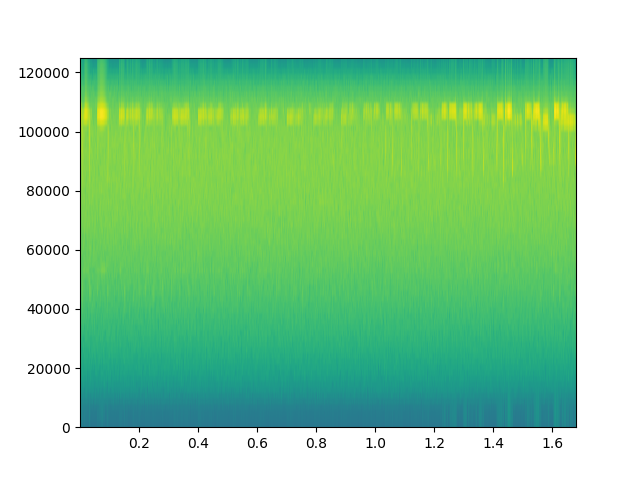

In [78]:
plt.figure()
s, f, t, im = plt.specgram(fm_highlighted, Fs=fs, NFFT=128, noverlap=127)


In [79]:
cutoff_frequency

104121.41666666667

In [80]:
f

array([     0.   ,   1953.125,   3906.25 ,   5859.375,   7812.5  ,
         9765.625,  11718.75 ,  13671.875,  15625.   ,  17578.125,
        19531.25 ,  21484.375,  23437.5  ,  25390.625,  27343.75 ,
        29296.875,  31250.   ,  33203.125,  35156.25 ,  37109.375,
        39062.5  ,  41015.625,  42968.75 ,  44921.875,  46875.   ,
        48828.125,  50781.25 ,  52734.375,  54687.5  ,  56640.625,
        58593.75 ,  60546.875,  62500.   ,  64453.125,  66406.25 ,
        68359.375,  70312.5  ,  72265.625,  74218.75 ,  76171.875,
        78125.   ,  80078.125,  82031.25 ,  83984.375,  85937.5  ,
        87890.625,  89843.75 ,  91796.875,  93750.   ,  95703.125,
        97656.25 ,  99609.375, 101562.5  , 103515.625, 105468.75 ,
       107421.875, 109375.   , 111328.125, 113281.25 , 115234.375,
       117187.5  , 119140.625, 121093.75 , 123046.875, 125000.   ])

In [81]:
only_legs = 20*np.log10(np.flipud(s[:-11,:]))
legs_profile = np.sum(only_legs,0)


<IPython.core.display.Javascript object>


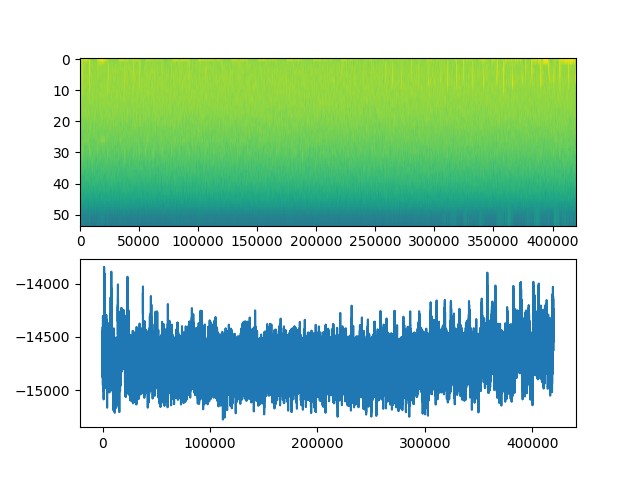

In [82]:
plt.figure()
plt.subplot(211)
plt.imshow(only_legs, aspect='auto')
plt.subplot(212)
plt.plot(legs_profile)
